In [152]:
import numpy as np
import math
import random
import statistics as stat
import matplotlib.pyplot as plt
from scipy import integrate
import seaborn as sns

## 4 номер

In [126]:
teta = 100
n = 100
array = []


def generate_x(F):
    return teta*(F+1)


for i in range(n):
    array.append(generate_x(random.random()))
print("Выборка - ", np.array(array))

Выборка -  [169.7206128  199.19183878 185.13724218 190.67657463 164.17099377
 121.94153666 100.54077115 101.04343727 133.71332027 117.61621961
 176.57856991 114.37221647 194.75890123 117.11550254 138.81607674
 155.00901306 168.19468632 126.42150391 159.7309882  108.51274923
 162.25778705 155.14143856 124.4549753  184.87023036 161.10254556
 144.78526458 117.18858084 156.30543779 195.26327749 192.113687
 193.21847415 153.88505816 154.97405725 195.76802707 162.71921055
 101.9450907  102.82951765 117.8605255  106.16059468 182.93049345
 149.34997044 142.56033763 179.97281589 114.76382585 183.87203971
 127.874213   187.34146745 150.61179161 173.40354052 134.34001992
 168.14685948 185.92841778 198.14880482 136.92889232 141.48772977
 125.17924339 120.27765334 180.76869507 193.59897396 130.56232946
 124.59159356 111.78633572 173.58521621 114.41224093 136.97347303
 182.93541961 158.37531314 183.68525592 104.4765949  114.73889396
 146.91330874 120.5827106  172.56791488 126.40002101 119.42888415
 

## Точный доверительный интервал

In [127]:
max_x = max(array)
f1 = str(max_x/(pow(0.975, 1/n) + 1))
f2 = str(max_x/(pow(0.025, 1/n) + 1))
print(f1 + ' ; '+ f2)

99.84312229637499 ; 101.67158919960463


## Ассимптотический доверительный интервал

In [128]:
def a_i(array, i):
    res = 0
    for el in array:
        res += el**i
    return res/len(array)

a_1 = a_i(array, 1)
a_2 = a_i(array, 2)

teta_a = (2/3)*a_1

abs_limit = 1.96*(2/3)*math.sqrt(a_2-a_1**2)/math.sqrt(n)

f1 = str(-abs_limit + teta_a)
f2 = str(abs_limit + teta_a)
print (f1 + " ; " + f2)

96.05135503032324 ; 104.04942546556924


## bootstrap

In [129]:
bt_delta = []
for i in range(1000):
    tmp = [random.choice(array) for j in range(n)]
    delta = a_i(tmp, 1)*(2/3) - teta_a
    bt_delta.append(delta)
    
bt_delta.sort()

a = int((1 - 0.95)*1000/2)
b = int((1 + 0.95)*1000/2)

f1 = str(teta_a - bt_delta[b])
f2 = str(teta_a - bt_delta[a])
print (f1 + " ; " + f2)

96.05955752773042 ; 104.09085888563632


##### если сравнивать интервалы, то точнее всего точный доверительный, далее ассимптотический и bootstrap

## 5 номер

In [182]:
teta = 5
n = 100
array_2 = []


def create(n, teta):
    return [(1 - x)**(1 / (1-teta)) for x in np.random.uniform(0,1,n)]

array_2 = create(n, teta)
print ("Выборка - ", np.array(array_2))

Выборка -  [1.00627617 1.05900756 1.34971254 1.23065184 1.27538399 1.129408
 1.03654112 1.35582751 1.44480571 1.27082697 1.08065645 1.05316178
 1.07237387 1.18916793 1.05032269 1.79152012 1.13959008 1.7539432
 3.02626481 1.05108522 1.05973434 1.01112076 1.03825923 1.05236728
 1.40515039 1.34192921 1.05545952 1.69976205 1.3647464  1.14728204
 1.41718104 1.07264328 2.1293191  1.08572911 1.40736662 1.01568478
 1.16689362 1.03041854 1.47832116 1.18796222 1.0230267  1.34442963
 2.29078343 1.1818136  1.209066   1.0049903  2.09760235 1.24654876
 1.4572554  1.19152981 1.45930794 1.2825579  1.00485225 1.44816487
 1.02107561 1.61087073 1.01410976 1.28310403 1.34569974 1.37476081
 1.19613434 1.2287856  1.84320537 1.27927967 1.03783891 1.6637554
 1.15528194 1.40192769 1.15157221 1.15140397 1.19681073 1.07091745
 1.72000022 1.70803795 1.01659627 1.18598495 1.02794476 1.86859038
 1.19867296 1.10493614 2.5627656  1.33724088 1.01896427 1.06334792
 1.11576552 1.41323583 1.24491691 1.76055567 1.59066939

## Доверительный интервал для медианы

In [183]:
x = 2**(1/(teta-1))

a = x - 1.96*x*math.log(2)/(math.sqrt(n)*(teta-1))
b = x + 1.96*x*math.log(2)/(math.sqrt(n)*(teta-1))

print(a,b)
print("медиана =", np.round(stat.median(array_2),5))

1.148816632618289 1.2295975973871531
медиана = 1.20387


## Байесовский доверительный интервал

In [184]:
def func(x, n, prod):
    return np.exp(1-x)*(x-1)**n  / ((prod)**x)

def integrate(prod, c = None, prob = 0.025):
    integral = 0
    low = 1
    high = 10e2
    step = 10e-4
    
    idxs = np.arange(low, high, step)
    
    if c is not None:
         for i in range(len(idxs)-1):
            try:
                part = step * 0.5* (func(idxs[i], n, prod)+func(idxs[i+1], n, prod)) * c
                integral += part
            except:
                return idxs[i]

            if integral>=prob:
                return idxs[i]
        
    
    else:
        for i in range(len(idxs)-1):
            try:
                part = step * 0.5* (func(idxs[i], n, prod)+func(idxs[i+1], n, prod)) 
                integral += part
            except:
                return integral

        return integral
    
prod = np.product(array_2)
integ = integrate(prod)

c = 1/integ
f1 = integrate(prod, c, 0.025)
f2 = integrate(prod, c, 0.975)

print(f1, f2)

<ipython-input-184-252a5eb01990>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(1-x)*(x-1)**n  / ((prod)**x)


4.18299999999965 5.705999999999482


## Ассимптотические доверительные интервалы

In [185]:
teta_e = n/np.sum(np.log(array_2))+1

a_a = - (1.96*(teta_e-1)/n**0.5)+teta_e
b_a =  (1.96*(teta_e-1)/n**0.5)+teta_e

print(str(a_a) + '; ' + str(b_a))

4.23647523008829; 5.814458178091536


## Параметрический bootstrap

In [186]:

p_deltas = []
for i in range(10000):
    new = create(len(array_2), teta_e)
    new_tet_e = n/np.sum(np.log(new))+1
    p_deltas.append(new_tet_e - teta_e)
    
p_deltas.sort()


b_p = -1*(p_deltas[int(0.025*len(p_deltas))]-teta_e)
a_p = -1*(p_deltas[int(0.975*len(p_deltas))]-teta_e)

print(str(a_p) + ";" + str(b_p))

4.133550398610957;5.702258756798948


## Непараметрический bootstrap

In [187]:
delta = np.array([])
teta_boot = np.array([])

for i in range(1000):
    bootstrap = np.random.choice(array_2, size = n).round(2) 
    delta = np.append(delta, n/np.sum(np.log(bootstrap))+1  - teta_e)
    teta_boot = np.append(teta_boot, n/np.sum(np.log(bootstrap))+1)
    

delta.sort() 
a_n, b_n = teta_e - delta[974], teta_e - delta[24]
print(str(a_n) + ";" + str(b_n))

4.1966176619732005;5.635005223909554


## Сравнение интервалов

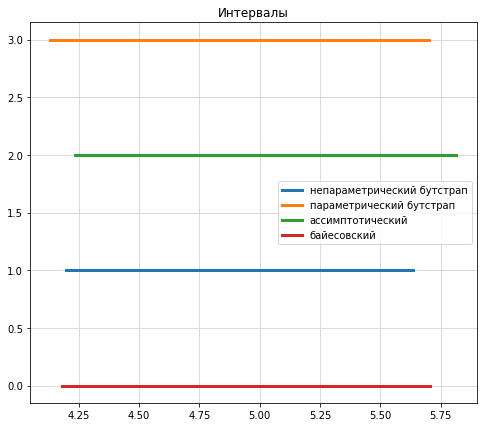

In [197]:
fig, ax = plt.subplots(figsize=(8,7))

ax.plot([a_n, b_n], [1,1], label = 'непараметрический бутстрап', linewidth= 3, color = 'red')
ax.plot([a_p, b_p], [3,3], label = 'параметрический бутстрап', linewidth= 3, color = 'purple')
ax.plot([a_a, b_a], [2,2], label = 'ассимптотический', linewidth= 3, color = 'g')
ax.plot([f1, f2], [0,0], label = 'байесовский', linewidth= 3)


ax.grid(color = 'lightgray')
ax.set_title('Интервалы')    

ax.legend(loc = 'best')